<a href="https://colab.research.google.com/github/Sai-Kale/DevOps/blob/master/Maven_Basics/maven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAVEN FOR DEVOPS:**

- How a Dev uses Maven
- Activites of a DevOps Engineer on Maven
- Build Projects on Maven

**What is Maven:**
 Maven is is a software project mgmt and comprehension tool. That works on the basis of Project Object Model (POM). maven can manage projects Build, reporting and documentation from a central peice of Infromation.

Devloper Activites:

- Write Code in favorite IDE.
- Compile the code locally and test it.
- Create a package
- Deploy it in a local application server, upon success deployment pushes the code the code to the local Source Code Repository(GIT).

While working on the project we use some third party libraries or packages.
when we need to make a package we need to make sure all the libraries are downloded and present to create a package. After testing the local we cant push entire package to GIT only the code. If I can give a single file where I mention all these dependencies on external libraries and file itself can Identify and download the libraries this is what Maven Does. The file in which all these information about Libraries in which our code is dependent is stored is called POM.xml .

**Maven Archtetype:**

Archetype is a maven project templating toolkit. An archetype is defined as original pattern or model pattern from which all the other things are made. This name fits as we are trying to provide a system that provides a consistent means of generating maven projects.

**Maven Co-ordinates:**

- Ggroup Id: This is generally unique for org or project.
- artifact Id: This artifactId is generally the same name of the project knwon by.
- verison: Version of the project code.

EX: Maven Co-ordinates for spring boot started pack.


#<dependency>
    <groupId>org.springframework.boot</groupId>
    <artifactId>spring-boot-starter-test</artifactId>
    <version>2.5.5</version>
    <scope>test</scope>
</dependency>


**Maven Build:**

Maven Build first time it will ask for Goals.
To understand we need to the Maven Build Lifecycle.

https://maven.apache.org/guides/introduction/introduction-to-the-lifecycle.html

Commonly used Goals are:
- clean (helps clean the files generated the previous build)
- validate (Validate all the information is correct and necessary information is avaiable)
- Compile (Compile the source code of the project)
- test-compile ( compile the test source code into the test destination directory)
- test (run tests using a suitable unit test framework)
- package(take the code and package into a distributable format such as JAR
- verify (run and check if the package is valid and meets the quality criteria)
- install ( install the package into the local repo, for use as a dependency in other projects locally)
- deploy ( copies the package to the remote repo for sharing with the other projects)

Note - There are build phases are executed in the order mentioned in maven till the step specified. By default all the earlier steps will be executed.
 
Reference: https://maven.apache.org/guides/introduction/introduction-to-the-lifecycle.html#Lifecycle_Reference

maven clean install (Will understand this if you check the above link)






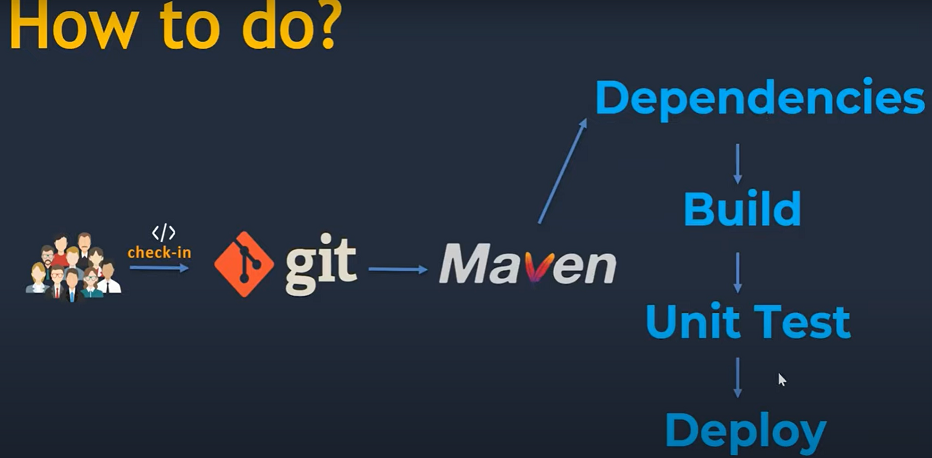

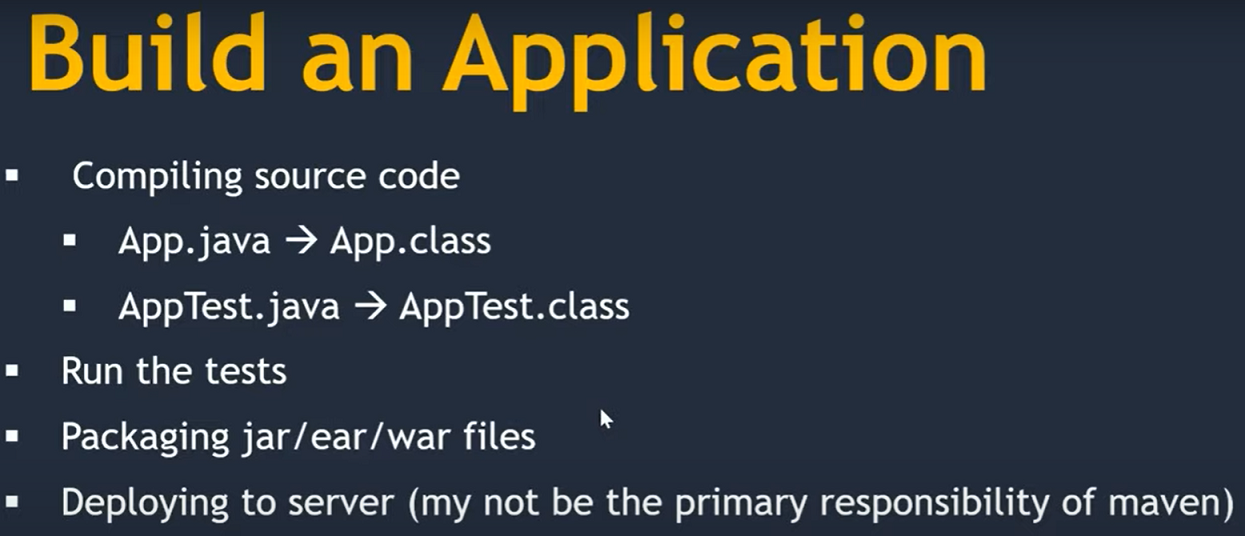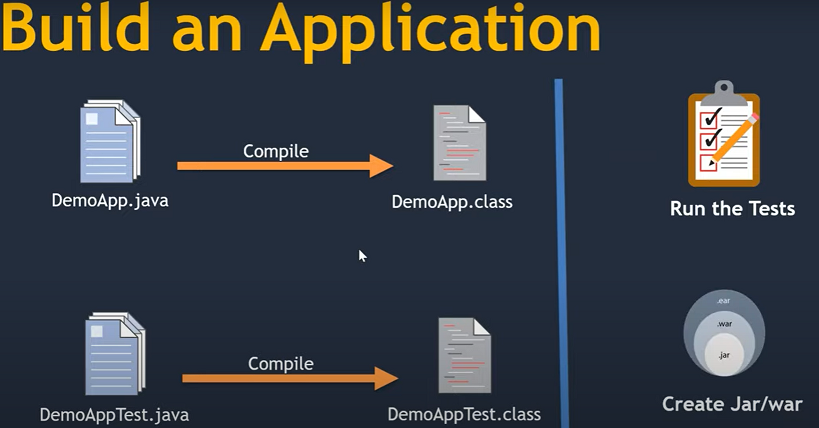

**POM.xml**

A Project Object Model is the fundamental unit of work in Maven. Its an XML that contains information about the project configuration details used by maven to build the project. It contains the default values for most projects. i.e. 'target' for build directory. 'src/main/java' for the source directory. 'src/test/java' for the test source directory. When executing a taks maven looks for the pom in the current directory.

In POM file we mention the dependencies, in the below example we mentioned spring-boot-test dependency.  It will download those dependent Jar file. In organizations we may also mention the nexus repos to pull those Jar files. The dependencies further download the dependencies require for them to run known as transitive dependency.
This can be seen in dependency hierarchy.

#<dependency>
    <groupId>org.springframework.boot</groupId>
    <artifactId>spring-boot-starter-test</artifactId>
    <version>2.5.5</version>
    <scope>test</scope>
</dependency>

**Local Repository & Remote Repository:**

When ever we mention the local repository its the users home directory under that there is folder that got created known as ".m2" inside which all the dependencies and app is installed when we do maven clean install.

When we do the package it builds and creates a package and places it in the target folder. Refer the below diagram for the directory structure.
Installation Directory is seperate and its in our local where we mention.

Generally the first time we build all the dependencies are pulled from maven central repository. But in most organaizations they use their own to avoid security issues and dependencies are pulled from the Enterprise Maven Repository. 
NOTE :If the Dependecies version or dependency is not present the build may fail or get error message saying build failed.






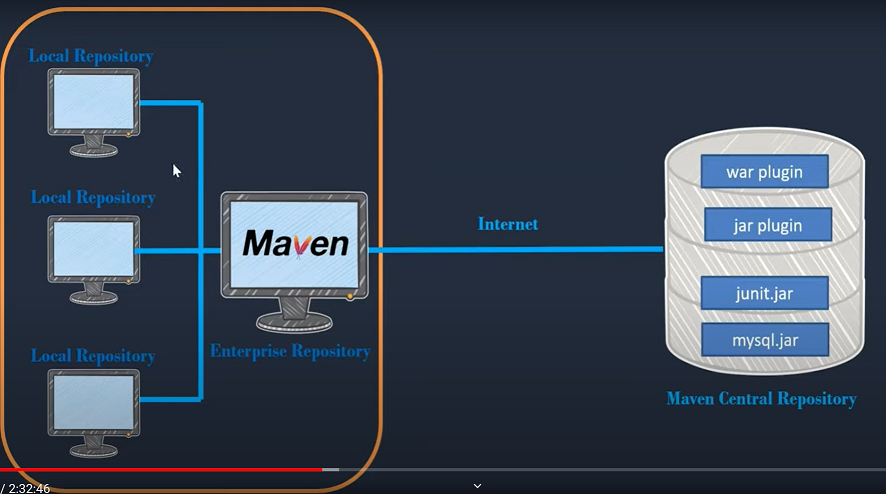

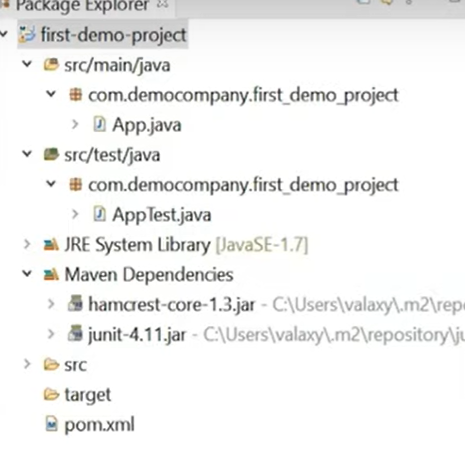

**Maven on Linux:**

Whenever the code is build and packaged the Developer pushes the only the source code to GIT. (Not package or dependencies). From there its the responsibility of DevOps engineer to deploy the code into some other environment. 

In the above picture we see as a devops engineer we only  need the src/ and pom.xml are commited to the remote repository. We ignore the target/ by mentioning it in the .gitignore file because the target contains the compiled and build packages of the source code which is not required.

If we do the build it will create the package in the directory in which the POM.xml is present inside the target directory.

The default installation directory is under the current user who runs the build.

/user/.m2 (installation directory) - In this our main interest is 'com' folder in which it places everything.

war packging is for web application, jar - is for java backend application.


**Setting.xml:**

The settings.xml file contains elements used to define values in which we configure maven execution in various ways, like the pom.xml.

https://maven.apache.org/settings.html

There are two location where this settings.xml file live.

- The Maven install: ${maven.home}/conf/settings.xml

- A user’s install: ${user.home}/.m2/settings.xml



Note : - Add <localRepository>/opt/caweb/M2</localRepository> in apache-maven-3.3.9\conf\settings.xml to change the installation directory of maven from default user/.m2 to some other location(/opt/caweb/M2).
- In order to deploy the code directly into Apache Tomcat server we need to mention the server details inside the pom.xml under plugin section and server credentails inside the settigns.xml. After this we can execute the deploy goal.(mvn tomcat7:deploy).

Here you can see the details for maven project and deploy on tomcat server: https://github.com/ravdy/maven


- In jenkins we need add maven build server as a slave to that jenkins. we might require couple of plugins like maven invoker and maven intergration install them.









